<a href="https://colab.research.google.com/github/DanielRaiicHu/regresion_lineal_tecnicas_avanzadas/blob/main/regresion_lineal_tecnicas_avanzadas.ipynb?forceRefresh=true&v=2">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [32]:
import pandas as pd

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
datos = pd.read_csv('/content/drive/MyDrive/regresion_lineal_tecnicas_avanzadas/dataset.csv',sep=';')

## Ver los datos

In [35]:
datos

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374
...,...,...,...,...
4995,135860,70,0.479357,0.752891
4996,166359,128,8.594487,0.370170
4997,147874,70,0.253138,0.421407
4998,35120,55,8.945226,0.680963


## Verificando el tamaño del dataset

In [36]:
datos.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [37]:
datos.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

* Una **asociación positiva** significa que las dos variables tienen una relación directa, o sea, ellas van por el mismo camino, o sea, si una variable sube, la otra también y sube, y si una variable baja, la otra también baja.

* Y la **asociación negativa** significa una relación indirecta o inversa entre dos variables. O sea, ellas caminan por direcciones opuestas, o sea, si una variable sube, la otra baja y viceversa

In [38]:
# La correlación de la variable que queremos predecir, con el resto de las variables.
datos.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


**Valor y Area:**

>**Correlación** = 0.7110
>
>**Conclusión:** Fuerte correlación positiva. Cuanto mayor es el área del inmueble, mayor tiende a ser su valor. Es una relación importante para el modelo.

**Valor y Dist_Playa:**

>**Correlación** = -0.3665
>
>**Conclusión:** Correlación negativa moderada. A medida que el inmueble está más lejos de la playa, su valor tiende a disminuir. Esto sugiere que estar más cerca de la playa incrementa el precio del inmueble.

**Valor y Dist_Farmacia:**

>**Correlación** = -0.0244
>
>**Conclusión:** Correlación muy baja o casi nula. La distancia a la farmacia no tiene influencia significativa sobre el valor del inmueble.

**Lo que aprendimos en esta aula:**

* Como importar la biblioteca pandas.
* Como leer y ver los datos.
* Como comprobar el tamaño del dataset.
* Como crear una tabla con estadísticos descriptivos de los datos del dataset.
* Como crear una matriz de correlación a partir de los datos de la tabla de estadísticos descriptivos.

# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [39]:
import seaborn as sns

## Configuración del formato de los gráficos

In [40]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
# Establece la paleta de colores para los gráficos en seaborn
sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks
# Define el estilo visual del gráfico (rejilla oscura de fondo)
sns.set_style('darkgrid')

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

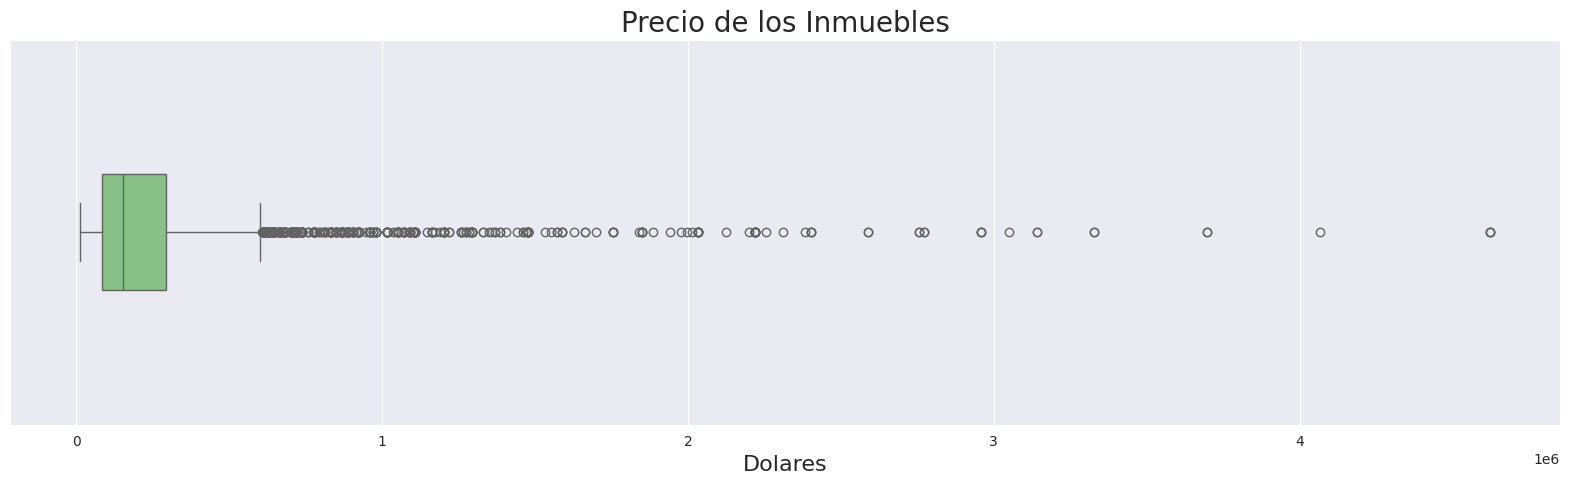

In [41]:
# Crea un gráfico de caja (boxplot) horizontal para la variable 'Valor'
ax=sns.boxplot(data=datos['Valor'],orient='h',width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
# Establece la etiqueta del eje X
ax.set_xlabel('Dolares', fontsize=16)
# Muestra el gráfico
ax

¿Qué se identificó?
>Distribución asimétrica hacia la derecha (sesgo positivo): se observa una gran cantidad de valores más bajos y una cola extensa hacia valores altos.
>
>La mayoría de los inmuebles se concentran en valores por debajo de 1 millón de dólares.
>
>Existen múltiples valores atípicos (outliers) muy elevados (inmuebles con precios que alcanzan hasta los 4 millones de dólares), que están representados como círculos individuales.

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distribución de Frecuencias'}, xlabel='Precio de los Inmuebles (US$)', ylabel='Density'>

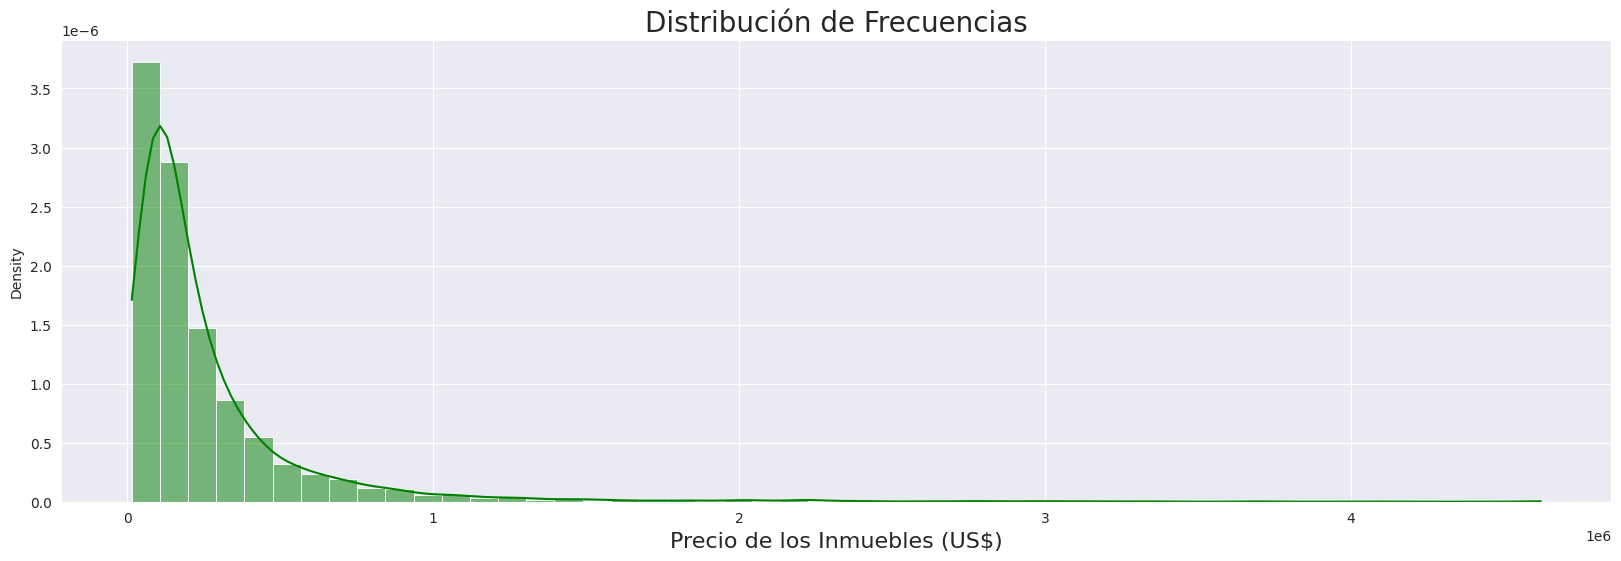

In [42]:
# Crea un histograma con curva de densidad (kde=True)
# La variable 'Valor' representa el precio de los inmuebles
# bins=50 define la cantidad de divisiones del histograma
# stat="density" indica que el eje Y muestra densidad (no frecuencia absoluta)
# color='green' define el color de las barras y la curva
ax = sns.histplot(datos['Valor'], kde=True, color='green', bins=50, stat="density")
ax.figure.set_size_inches(20, 6)                                  # Ajusta el tamaño del gráfico (ancho = 20, alto = 6)
ax.set_title('Distribución de Frecuencias', fontsize=20)          # Establece el título del gráfico
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)       # Etiqueta para el eje X (unidad monetaria en dólares)
ax                                                                # Muestra el gráfico en pantalla

* **Eje horizontal (x):** Este eje representa el "Precio de los Inmuebles (US$)", como lo has etiquetado. Los números que ves (0, 1, 2, etc.) son los valores del precio de los inmuebles en miles de dólares (o la unidad que estés usando). Cada barra del histograma se sitúa sobre un rango de precios.

* **Eje vertical (y):** Este eje representa la "Densidad". En términos simples, la densidad es una forma de representar la frecuencia (cuántas veces aparece un valor) de forma que el área total bajo la curva del histograma sea igual a 1. No es exactamente la cantidad de inmuebles, sino una representación normalizada de la frecuencia.

**Interpretación:**

> Si ves una barra alta en el rango de precios "1", significa que hay una alta densidad de inmuebles con precios cercanos a 1 (en la unidad que estés usando). Si la barra es baja en el rango "5", significa que hay una baja densidad de inmuebles con precios cercanos a 5.

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

Gráfico 1 – Dispersión simple entre variables

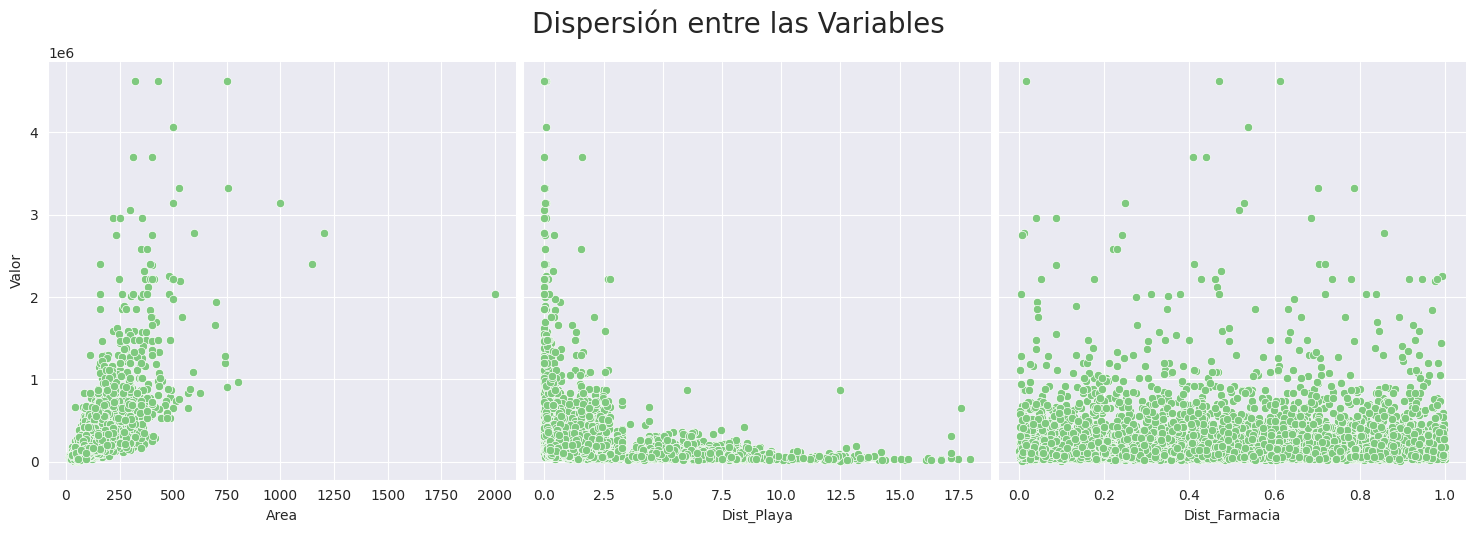

In [43]:
# Crea un gráfico de dispersión múltiple (pairplot) con seaborn
# Compara la variable dependiente 'Valor' contra las variables independientes
# 'Area', 'Dist_Playa' y 'Dist_Farmacia' en subgráficos individuales
# height=5 define la altura de cada subgráfico
ax = sns.pairplot(datos, y_vars='Valor', x_vars=['Area','Dist_Playa','Dist_Farmacia'], height=5)

# Agrega un título general al conjunto de gráficos
# y=1.05 eleva el título para que no se superponga con los subgráficos
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)

# Muestra el gráfico
ax

Gráfico 2 – Dispersión con línea de regresión (kind='reg')

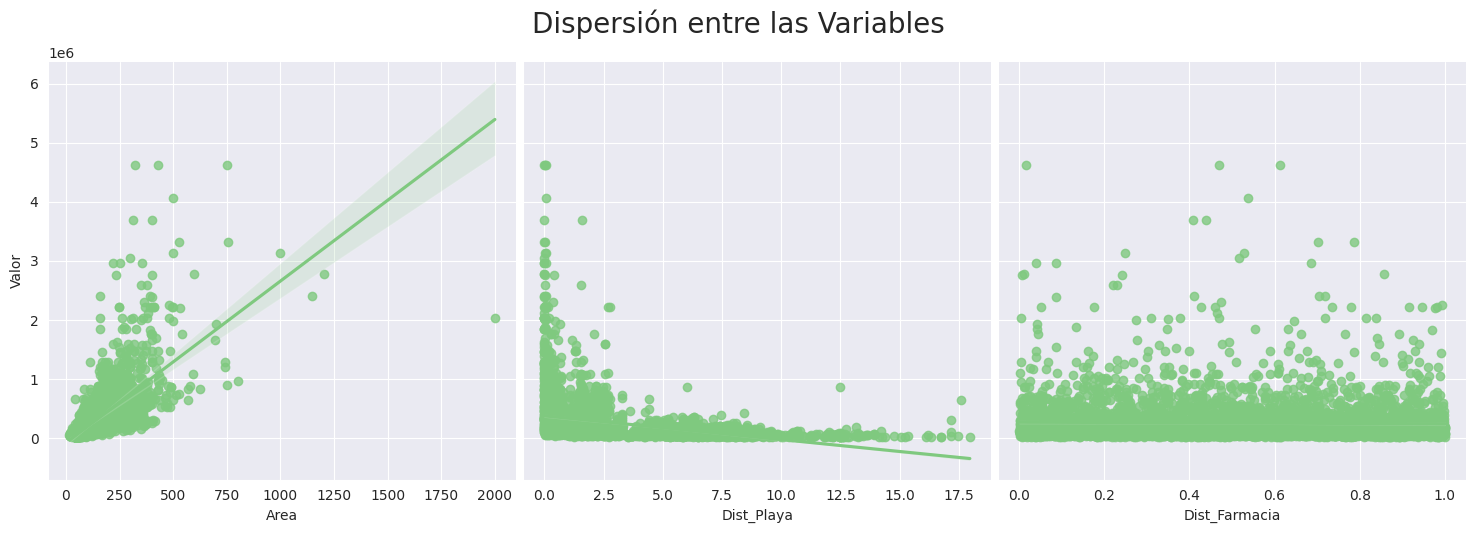

In [44]:
# Crea el mismo gráfico de dispersión, pero esta vez agregando líneas de regresión lineal
# kind='reg' activa las líneas de ajuste (regresión lineal) por variable
ax = sns.pairplot(datos, y_vars='Valor', x_vars=['Area','Dist_Playa','Dist_Farmacia'], height=5, kind='reg')

# Título general del gráfico
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)

# Muestra el gráfico
ax

# Podemos ver que la línea no sigue de regresión
# concluimos que la variable valor, no está relacionada de forma lineal con las variables explicativas
# por lo tanto no podemos estimar el modelo de regresión lineal.

**Análisis de los Gráficos**

**¿Qué se visualizó?**

* Tres gráficos de dispersión que relacionan la variable dependiente Valor con cada una de las variables independientes: Area, Dist_Playa y Dist_Farmacia.

* En el segundo gráfico se añade una línea de regresión lineal para observar la relación visualmente.

**¿Qué se identificó?**

>**Area vs Valor:**
>
>* Se observa una tendencia creciente: mayor área, mayor valor del inmueble.
>
>* Sin embargo, la presencia de outliers y la dispersión hacen que la línea de regresión no ajuste perfectamente.
>
>**Dist_Playa vs Valor:**
>
>* Se percibe una relación negativa, aunque no es lineal ni clara.
>
>* Los valores más altos se concentran cerca de la playa (distancias menores).
>
>**Dist_Farmacia vs Valor:**
>
>* No se observa relación aparente entre estas dos variables.
>
>* La nube de puntos es completamente dispersa.

**Conclusión (sobre regresión lineal sin transformación):**

* La variable Valor no presenta una relación lineal fuerte y clara con todas las variables explicativas.

* Esto indica que el modelo de regresión lineal simple directa no es adecuado con los datos en su forma actual.

* Se sugiere aplicar transformaciones (como logaritmo) para mejorar la linealidad y ajustar un modelo más representativo.

**Lo que aprendimos en esta aula:**

* Como configurar el formato de los gráficos.
* Como construir el box-plot de la variable dependiente.
* Como graficar la distribución de frecuencias de la variable dependiente.
* Como graficar los diagramas de dispersión entre las variables del dataset.
* Análisis de dispersión entre las variables.

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [45]:
import numpy as np

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [46]:
np.log(1)

np.float64(0.0)

In [47]:
# Aplica la transformación logarítmica natural (np.log) a la variable 'Valor' y 'Area'
# Esto ayuda a reducir la asimetría positiva y suavizar valores extremos
# La variable Valor y Area no tiene valores mínimos iguales a 0, por lo que podemos hacer lo siguiente:
datos['log_Valor'] = np.log(datos['Valor'])
datos['log_Area'] = np.log(datos['Area'])
# En 'Dist_Playa' y 'Dist_Farmacia' existen valores igual a 0, lo cual es incompatible con logaritmo
# Se le debe cambiar la escala agregando + 1 a cada valor para evitar log(0), que es indefinido
datos['log_Dist_Playa']=np.log(datos['Dist_Playa']+1)
datos['log_Dist_Farmacia']=np.log(datos['Dist_Farmacia']+1)

In [48]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,850277,280,0.240925,0.793637,13.653317,5.634790,0.215857,0.584245
1,166359,208,0.904136,0.134494,12.021903,5.337538,0.644028,0.126187
2,471349,170,0.059525,0.423318,13.063354,5.135798,0.057821,0.352991
3,101664,100,2.883181,0.525064,11.529429,4.605170,1.356655,0.422036
4,406654,164,0.239758,0.192374,12.915718,5.099866,0.214916,0.175946


Aplicar una transformación como el logaritmo es una técnica estadística válida, común y recomendada, especialmente cuando:

* La variable dependiente es altamente asimétrica.

* Existen outliers que distorsionan la regresión.

* La relación entre variables no es lineal en su forma original.

Lo importante es que esta transformación debe tener sentido para el análisis y que seas transparente con ella al reportar resultados.


**¿Por qué se permite aplicar logaritmo?**

Porque no se están cambiando las relaciones internas entre los datos, sino:

* Reescalando las variables para que cumplan los supuestos de la regresión lineal.

* Mejorando la linealidad, normalidad de errores, y homocedasticidad (varianza constante).

## Distribuición de frecuencias de la variable *dependiente transformada* (y)

<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='log del Precio de los Inmuebles', ylabel='Density'>

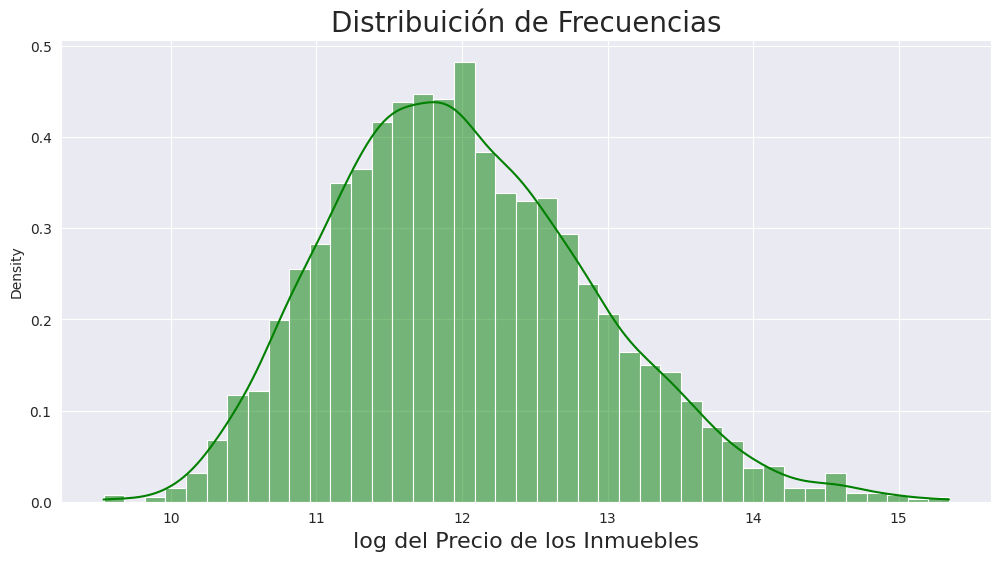

In [49]:
# Crea un histograma de la variable 'log_Valor' con curva de densidad (kde=True)
ax = sns.histplot(datos['log_Valor'], kde=True, color='green', stat="density")
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

**Análisis del gráfico generado**

**¿Qué se visualizó?**

* Un histograma de la variable log_Valor con su curva de densidad.

* Muestra cómo quedó la distribución del precio de los inmuebles luego de aplicar logaritmo natural.

**¿Qué se identificó?**

* La distribución es ahora mucho más simétrica, con forma de campana (similar a normal).

* Se redujo notablemente el efecto de los outliers que antes alargaban la cola derecha.

* Se eliminó gran parte de la asimetría que dificultaba el ajuste de un modelo lineal.

**¿Qué se puede hacer?**

* Ahora sí es viable aplicar un modelo de regresión lineal, ya que la variable dependiente (log_Valor) presenta una distribución más cercana a normal.

* La transformación facilita cumplir con uno de los supuestos fundamentales de la regresión: normalidad de los errores y linealidad en la relación con las variables explicativas.

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

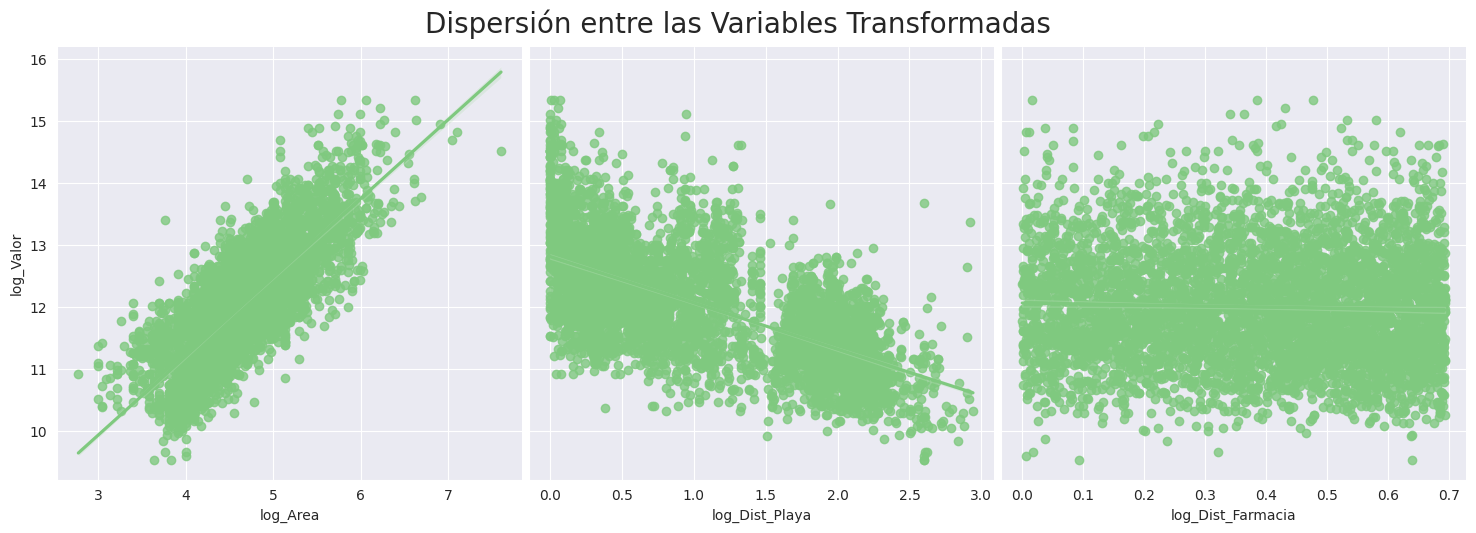

In [50]:
# Crea gráficos de dispersión con líneas de regresión entre log_Valor y cada variable transformada
# y_vars: variable dependiente en escala logarítmica
# x_vars: variables independientes transformadas logarítmicamente
# height=5: altura de cada gráfico
# kind='reg': agrega la línea de regresión lineal en cada subgráfico
ax = sns.pairplot(datos, y_vars='log_Valor', x_vars=['log_Area','log_Dist_Playa','log_Dist_Farmacia'], height=5, kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax

**Análisis del gráfico generado**

**¿Qué se visualizó?**

* La relación entre log_Valor (precio del inmueble transformado) y las variables transformadas log_Area, log_Dist_Playa y log_Dist_Farmacia, incluyendo líneas de regresión lineal.

**¿Qué se identificó?**

>**log_Area vs log_Valor:**
>
>* Se observa una fuerte relación lineal positiva.
>
>* La nube de puntos sigue bien la línea de regresión, lo cual mejora mucho respecto a la versión sin transformar.
>
>* Es una variable explicativa potente.
>
>**log_Dist_Playa vs log_Valor:**
>
>* Relación negativa, más clara que antes.
>
>* A medida que la distancia a la playa aumenta (aunque en escala log), el valor tiende a disminuir.
>
>* La transformación hizo más visible la tendencia.
>
>**log_Dist_Farmacia vs log_Valor:**
>
>* Sigue sin mostrar relación clara.
>
>* La nube de puntos está dispersa y no sigue la línea de regresión.
>
>* Es la variable menos relevante para el modelo, incluso transformada.

**¿Qué se puede hacer?**
El modelo de regresión lineal es ahora viable con las variables transformadas.

Se puede considerar eliminar log_Dist_Farmacia o mantenerla solo para comprobar su peso en el modelo.

Esta transformación mejoró significativamente el cumplimiento del supuesto de linealidad entre las variables.

**Lo que aprendimos en esta aula:**

* Como aplicar la transformación logarítmica a los datos del dataset.
* Como graficar la distribución de frecuencias de la variable dependiente transformada.
* Como graficar los diagramas de dispersión entre las variables transformadas del dataset.
* Cómo analizar la dispersión entre las variables transformadas.

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [51]:
# Importa la función train_test_split desde la biblioteca scikit-learn
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [52]:
# Para utilizar train_test_split, debemos ingresar unos parametros de entrada:
# Primer dato de entrada:
# Define el DataFrame que contiene la variable dependiente transformada
# En este caso, el logaritmo natural del precio del inmueble
y = datos['log_Valor']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [53]:
# Segundo dato de entrada:
# Define el DataFrame con las variables explicativas transformadas
# Como tenemos más de una variable explicativa, debemos colocar doble corchete [[]] para mantener el formato de DataFrame (no Serie)
X=datos[['log_Area','log_Dist_Playa','log_Dist_Farmacia']]

## Creando los datasets de entrenamiento y de prueba

In [54]:
# Aplica la función train_test_split para dividir los datos en entrenamiento y prueba

# X_train: (Es el X del conjunto de Entrenamiento) -> Este almacenará los valores de las variables explicativas del conjunto Entrenamiento
# X_test: (Es el X del conjunto de Prueba) -> Este almacenará los valores de las variables explicativas del conjunto de Prueba
# y_train: (Es el y del conjunto de Entrenamiento) -> Este almacenará los valores de la variable dependiente del conjunto Entrenamiento
# y_test: (Es el y del conjunto de Prueba) -> Este almacenará los valores de la variable dependiente del conjunto de Entrenamiento
# X_train e y_train están relacionados, a su vez, X_test e y_test también tienen relación
# Parametros de entrada: X -> Dataframe que contiene las variables explicativas, y -> Dataframe que contiene la variable dependiente
# test_size: Es la cantidad que vamos a separar para el conjunto de prueba en términos de porcentaje
# utilizaremos 0.2, porque tenemos una gran cantidad de datos (5000)
# el 80% restante se asignará al conjunto entrenamiento
# random_state: Es una semilla que sirve para generar números aleatorios, sirve para que ejecutar siempre los mismos datos de entrenamiento y prueba si es que la semilla es igual
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

**Análisis del procedimiento**

**¿Qué se hizo?**

Se dividió el dataset en dos subconjuntos:

>* Conjunto de entrenamiento (80%): donde el modelo aprenderá a identificar patrones.
>
>* Conjunto de prueba (20%): para evaluar si el modelo generaliza bien a nuevos datos.

**¿Por qué es importante dividir así?**

* Entrenar y probar el modelo con los mismos datos produce resultados sobreajustados (overfitting).

* Separar los datos permite evaluar el desempeño real del modelo con nuevos valores que no ha visto antes.

**¿Qué hace random_state?**

* Garantiza que, aunque train_test_split selecciona datos aleatoriamente, se pueda reproducir exactamente la misma división si se usa la misma semilla.

* Es útil para comparar modelos y asegurar consistencia en pruebas.

**¿Qué se puede hacer después?**

Con los datos separados, ahora puedes:

>* Ajustar el modelo con X_train y y_train.
>
>* Evaluarlo con X_test y y_test.

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

`log(Valor) = β0 + β1 log(Area) + β2 log(Dist_Playa) + β3 log(Dist_Farmacia)+u`

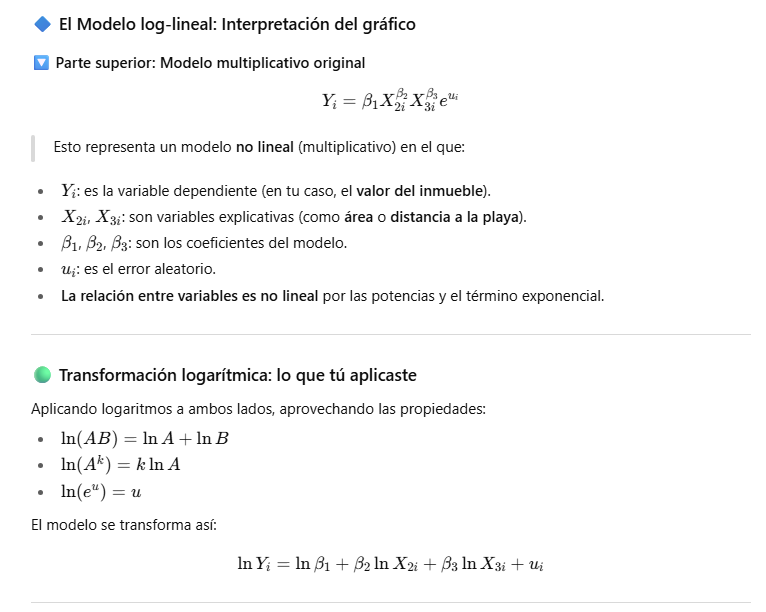

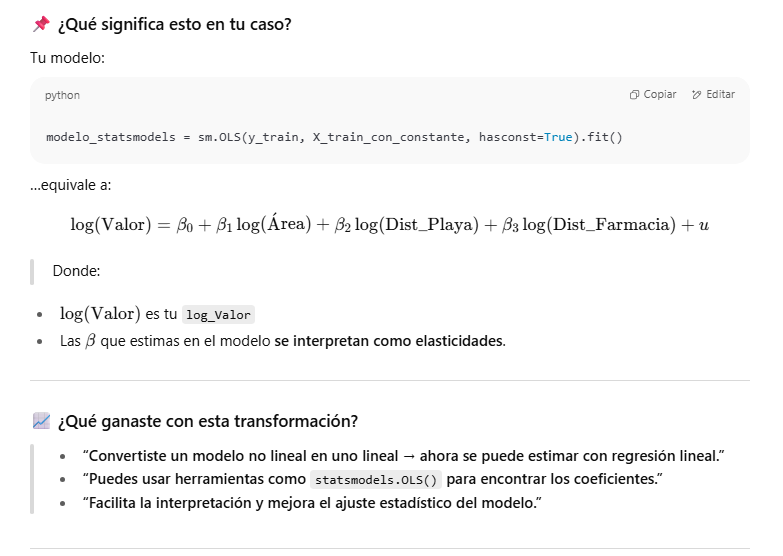

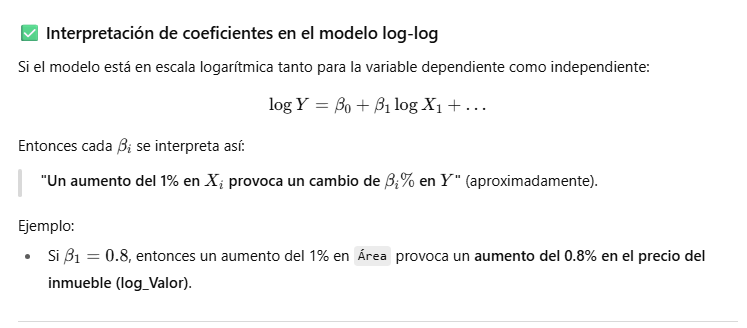

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [55]:
import statsmodels.api as sm

## Estimando el modelo con statsmodels

In [56]:
# Agrega explícitamente una constante al conjunto de entrenamiento
# Esto permite que el modelo estime un intercepto β₀
# Para incluir la constante del modelo, debemos incluir en un DataFrame del conjunto de entrenamiento formado por las variables explicativas que fue X_train.
# Si no se agrega, statsmodels asumirá que la recta pasa por el origen
X_train_con_constante = sm.add_constant(X_train)

# La estimación del modelo con constante asegura que los residuos que son la situación de ui en esta ecuación, tenga un promedio de 0.

In [57]:
X_train_con_constante

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [58]:
# Estima el modelo de regresión lineal usando el método OLS (mínimos cuadrados ordinarios)
# y_train: variable dependiente (log del valor de los inmuebles)
# X_train_con_constante: variables explicativas con constante agregada
# hasconst=True: le indica al modelo que la constante ya fue incluida manualmente
# fit(): Es el método que se encarga de "entrenar" el modelo, es decir, de encontrar los valores de los coeficientes que mejor se ajustan a los datos de entrenamiento.
# Coeficientes: Son los valores que definen la relación entre las variables explicativas y la variable dependiente en el modelo de regresión lineal.
modelo_statsmodels = sm.OLS(y_train, X_train_con_constante, hascont = True ).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [59]:
# Muestra un resumen estadístico detallado del modelo estimado
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Fri, 01 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:39:29   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06

**Análisis del procedimiento**

**¿Qué se hizo?**

Se estimó un modelo de regresión lineal múltiple con las variables transformadas:

>* log_Area
>
>* log_Dist_Playa
>
>* log_Dist_Farmacia

Se agregó una constante manualmente para que el modelo pueda estimar el intercepto (β₀).


**¿Por qué es importante agregar la constante?**

>* Permite que la recta del modelo no esté obligada a pasar por el origen.
>
>* Garantiza que los residuos tengan media cero, cumpliendo uno de los supuestos clásicos de la regresión lineal.

**¿Qué entrega modelo_statsmodels.summary()?**
Una tabla con:

>* R² y R² ajustado: qué tan bien se ajusta el modelo a los datos.
>
>* Coeficientes (coef) estimados: los valores de β para cada variable.
>
>* Errores estándar (std err), estadísticos t y p-valores: para evaluar la significancia individual de cada variable.
>
>* Indicadores de diagnóstico como el F-statistic, Durbin-Watson, entre otros.

**¿Qué se puede hacer ahora?**

>* Interpretar los coeficientes y ver cuáles variables tienen un efecto significativo sobre log_Valor.
>
>* Evaluar el R² ajustado para ver si el modelo tiene buen poder explicativo.
>
>* Analizar residuos, verificar supuestos, y en caso necesario, ajustar el modelo.



✅ Resumen clave para interpretar el modelo de regresión

**R² (R-squared):**
- **Definición:** Mide el porcentaje de la variabilidad en `log_Valor` que es explicada por las variables independientes (`log_Area`, `log_Dist_Playa`, `log_Dist_Farmacia`).
- **Función:** Indica qué proporción de la variación del precio (logarítmico) del inmueble es explicada por el modelo.
- **Interpretación del valor obtenido (0.805):** El **80.5%** de la variabilidad del log del precio del inmueble es explicada por las variables del modelo.
- **Importante:** Cuanto más cercano a 1, mejor el ajuste.
- **Limitación:** Siempre aumenta (o se mantiene) al añadir más variables, incluso si no aportan valor real.

---

**R² Ajustado (Adjusted R²):**
- **Definición:** Versión corregida del R² que **penaliza la inclusión de variables irrelevantes**, considerando los grados de libertad.
- **Utilidad:** Es más confiable cuando se agregan varias variables. Si baja al añadir una nueva variable, esta **no aporta valor explicativo**.
- **Valor obtenido:** `0.805`
- **Interpretación:** Al ser igual al R², **no hay penalización significativa**, lo que sugiere que las variables incluidas son adecuadas y relevantes.
- **Función clave:** Ayuda a prevenir el **sobreajuste (overfitting)**.

---

**F-statistic y su p-valor (`Prob (F-statistic)`):**
- **Hipótesis nula:** Todos los coeficientes del modelo (salvo la constante) son cero → el modelo no explica nada.
- **Resultado:** `Prob (F-statistic) = 0.000`
- **Conclusión:** Se **rechaza la hipótesis nula**. El modelo en su conjunto es **estadísticamente significativo**.

---

**Grados de libertad:**
- Representan la cantidad de información disponible para estimar los coeficientes.
- Cada variable añadida reduce los grados de libertad.
- El R² ajustado **los considera** en su cálculo.

---

**Test F (significancia global):**
- **Evaluación:** Verifica si **al menos una variable independiente tiene efecto sobre la variable dependiente**.
- **Criterio:** Si el p-valor < 0.05, el modelo es estadísticamente válido.

---

**P-valor (significancia):**
- Aplica tanto al **Test F (modelo completo)** como al **Test T (coeficientes individuales)**.
- Si el **p-valor < 0.05**, existe **evidencia estadística suficiente** para afirmar que hay una relación significativa.

---

**Test T (evaluación individual de cada coeficiente):**
Evalúa si cada **variable individualmente** es significativa en el modelo.

```
| Variable          | Coeficiente | P-valor (P>|t|)   | ¿Es significativa?    |
|-------------------|-------------|-------------------|-----------------------|
| const             | 7.6534      | 0.000             |  Sí (intercepto)      |
| log_Area          | 1.0580      | 0.000             |  Sí                   |
| log_Dist_Playa    | -0.4905     | 0.000             |  Sí                   |
| log_Dist_Farmacia | -0.0167     | 0.603             |  No                   |
```

---

**Conclusión específica:**
- **`log_Area`** y **`log_Dist_Playa`** son estadísticamente significativas y tienen impacto real sobre el precio del inmueble.
- **`log_Dist_Farmacia`** **no es significativa** → puede considerarse eliminarla del modelo para simplificar y mejorar eficiencia.

---

**Conclusión general:**
> El modelo es **estadísticamente válido** y **explica una alta proporción de la variabilidad del precio**.  
> Se recomienda **eliminar `log_Dist_Farmacia`**, reestimar el modelo y comparar si mejora el R² ajustado y la interpretación general.

# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

## Creando los datasets de entrenamiento y de prueba

## Estimando el modelo con el statsmodels

## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando la clase *LinearRegression()*

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

## Generando predicción puntual

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

## Creando un simulador simple

# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

## Confirmando el orden de las variables explicativas en el DataFrame

## Creando una lista de nombres de las variables del modelo

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

## Obteniendo los residuos

## Graficando la distribuición de frecuencias de los residuos

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax